In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
# %matplotlib inline

In [40]:
import urllib.request
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','01_02/stations.txt')

('01_02/stations.txt', <email.message.Message at 0x1183e9a20>)

In [41]:
stations = {}
for line in open('01_02/stations.txt','r'):
    if 'GSN' in line:
        fields = line.split()
        
        stations[fields[0]] = ' '.join(fields[4:])

In [42]:
len(stations), stations

(994,
 {'AE000041196': 'SHARJAH INTER. AIRP GSN 41196',
  'AF000040930': 'NORTH-SALANG GSN 40930',
  'AG000060390': 'ALGER-DAR EL BEIDA GSN 60390',
  'AG000060590': 'EL-GOLEA GSN 60590',
  'AG000060611': 'IN-AMENAS GSN 60611',
  'AG000060680': 'TAMANRASSET GSN 60680',
  'AJ000037989': 'ASTARA GSN 37989',
  'ALM00013615': 'TIRANA RINAS GSN 13615',
  'AM000037781': 'ARAGAC VISOKOGORNAYA GSN 37781',
  'AO000066160': 'LUANDA GSN 66160',
  'AO000066270': 'WAKU KUNGU (CELA) GSN 66270',
  'AO000066390': 'LUBANGO (SA DA BAND GSN 66390',
  'AO000066410': 'MENONGUE (SERPA PIN GSN 66410',
  'AO000066422': 'MOCAMEDES GSN 66422',
  'AO000066447': 'MAVINGA GSN 66447',
  'AQW00061705': 'AS PAGO PAGO WSO AP GSN 91765',
  'AR000087007': 'LA QUIACA OBSERVATO GSN 87007',
  'AR000087065': 'RIVADAVIA GSN 87065',
  'AR000087078': 'LAS LOMITAS GSN 87078',
  'AR000087155': 'RESISTENCIA AERO GSN 87155',
  'AR000087217': 'LA RIOJA AERO. GSN 87217',
  'AR000087257': 'CERES AERO GSN 87257',
  'AR000087270': 'RECO

In [43]:
def findstation(s):
    found = {code: name for code,name in stations.items() if s in name}
    print(found)

In [44]:
findstation('LIHUE')

{'USW00022536': 'HI LIHUE WSO AP 1020.1 GSN 91165'}


In [45]:
datastations = ['USW00022536','USW00023188','USW00014922','RSM00030710']

In [46]:
def load_data(p_filename):
    '''This method is for loading NOAA station and tempreture data from text files '''
    return np.genfromtxt(p_filename,
                         delimiter = [11,4,2,4] + [5,1,1,1] * 31,
                         usecols = [1,2,3] + [4*i for i in range(1,32)],
                         dtype = [np.int64,np.int64,(np.str_,4)] + [np.float64] * 31)

lihue = load_data('01_02/USW00022536.dly')
lihue

array([ (1950, 2, 'TMAX', 256.0, 256.0, 256.0, 267.0, 217.0, 228.0, 256.0, 272.0, 256.0, 256.0, 256.0, 244.0, 256.0, 256.0, 244.0, 244.0, 250.0, 256.0, 239.0, 250.0, 256.0, 256.0, 267.0, 261.0, 267.0, 267.0, 261.0, 261.0, -9999.0, -9999.0, -9999.0),
       (1950, 2, 'TMIN', 178.0, 156.0, 161.0, 167.0, 167.0, 167.0, 189.0, 211.0, 206.0, 217.0, 217.0, 211.0, 200.0, 200.0, 206.0, 183.0, 206.0, 206.0, 206.0, 194.0, 206.0, 200.0, 206.0, 200.0, 211.0, 183.0, 172.0, 200.0, -9999.0, -9999.0, -9999.0),
       (1950, 2, 'PRCP', 0.0, 0.0, 0.0, 0.0, 737.0, 406.0, 36.0, 38.0, 0.0, 0.0, 0.0, 0.0, 18.0, 5.0, 10.0, 18.0, 15.0, 5.0, 0.0, 0.0, 23.0, 10.0, 3.0, 48.0, 0.0, 0.0, 0.0, 5.0, -9999.0, -9999.0, -9999.0),
       ...,
       (2015, 9, 'WT03', -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, 1.0, -9999.0, 1.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999

In [56]:
from calendar import monthrange

def get_temp(value):
    if value == -9999:
        return np.nan
    else:
        return float(value/10)

# def is_missing(value):
#     if value == -9999:
#         return False
#     else:
#         return True
    
def unroll(p_record):
    ''' This methd is convert each line of loaded data into records 
        representing each specific date with its max and min temperatures'''
    year = p_record[0]
    month = p_record[1]
    element = p_record [2]
    month_days = monthrange(year, month)[1]
    dates = [np.datetime64('{}-{:02}-{:02}'.format(year, month, day)) for day in range(1,month_days+1) if element ==  'TMIN' or element ==  'TMAX']
    day_infos = [(date, get_temp(p_record[idx+3])) for idx,date in enumerate(dates)]  
    return np.array(day_infos, dtype=[('date','M8[D]'),('value','f8')])
#     day_infos = [(date, get_temp(p_record[idx+3]), is_missing(p_record[idx+3])) for idx,date in enumerate(dates)]  
#     return np.array(day_infos, dtype=[('date','M8[D]'),('value','f8'),('is_missing','bool_')])

In [57]:
def interpolate_missings(p_data):
    '''
    This is convert the missing temperature value (-9999 whcih is converted to NaN in the unroll method) 
    into more useful using interpolation that fills nan values
    '''
    A = p_data['value']
    ok = ~np.isnan(A) # Boolean masking with False for NaN values
    xp = ok.ravel().nonzero()[0] # index of non NaN
    fp = A[ok] # returns non NaN values
    x  = np.isnan(A).ravel().nonzero()[0]# index of NaN
    A[np.isnan(A)] = np.interp(x, xp, fp)
    return A

# 2013-04-20


In [58]:
def getobs(p_filename, p_element):
    '''This is to stack all MIN (or MAX) records into a 1-D array.'''
    return np.hstack([unroll(record) for record in load_data(p_filename) if record[2] == p_element])

In [59]:
'''This piece of code is to stack targeted data and replace the missings with the most appropriate value.'''
lihue_tmin = getobs('01_02/USW00022536.dly','TMIN')
interpolate_missings(lihue_tmin)
lihue_tmax = getobs('01_02/USW00022536.dly','TMAX')
interpolate_missings(lihue_tmax)

array([ 25.6,  25.6,  25.6, ...,  28.9,  28.9,  28.9])

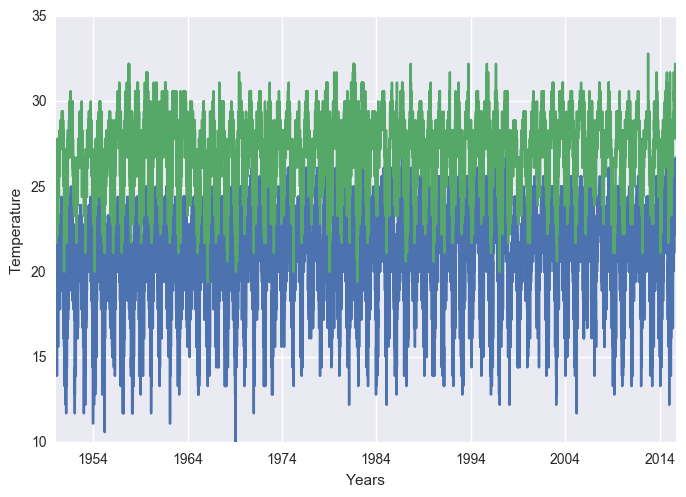

In [60]:
_=plt.plot(lihue_tmin['date'], lihue_tmin['value'])
_=plt.plot(lihue_tmax['date'], lihue_tmax['value'])
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.show()

In [61]:
np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])

(21.051530250594173, 27.300908977192176)

In [62]:
def plot_smoothed(p_data,p_window=20):
    '''This is to smoothen Temperature data by mean and plot it'''
    x = pd.Series(p_data['value'])
    temperature=x.rolling(center=True,window=p_window).mean()
    plt.plot(p_data['date'],temperature)
    plt.xlabel('Years', fontsize=10)
    plt.ylabel('Temperature', fontsize=10)

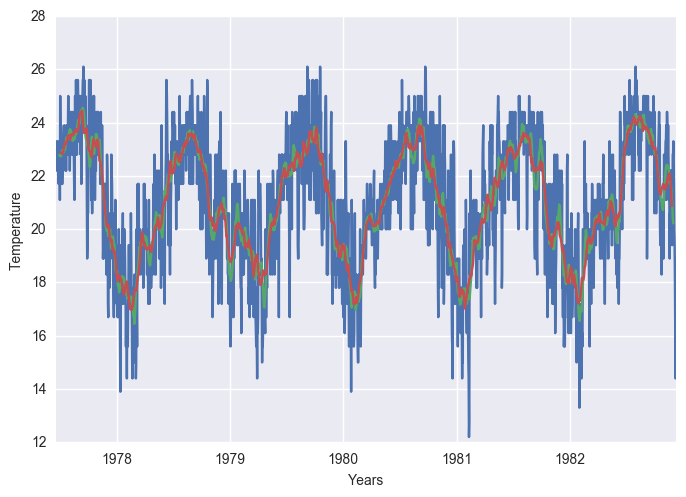

In [63]:
plt.plot(lihue_tmin[10000:12000]['date'],lihue_tmin[10000:12000]['value'])

plot_smoothed(lihue_tmin[10000:12000])
plot_smoothed(lihue_tmin[10000:12000],30)
plt.show()

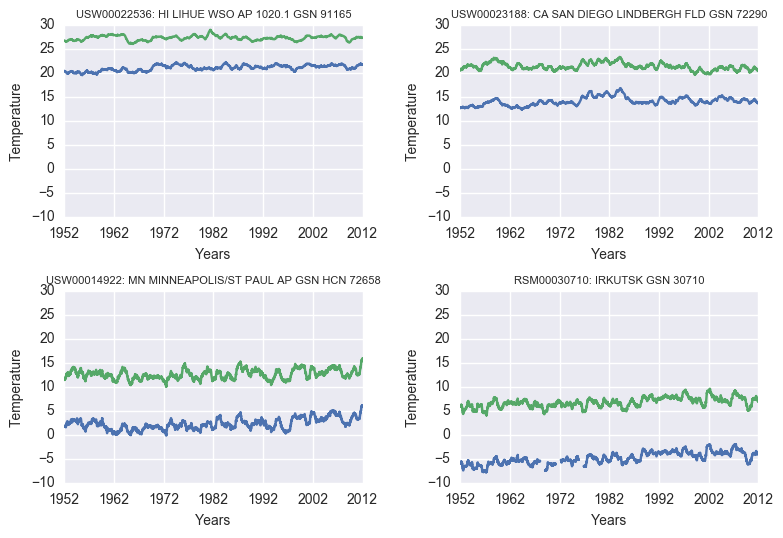

In [64]:
'''This piece of code is to plot the MIN. and MAX. Temperatres of each station'''
for i, code in enumerate(datastations):
    plt.subplot(2,2,i+1) 
    plot_smoothed(getobs('01_02/{}.dly'.format(code),'TMIN'),365)
    plot_smoothed(getobs('01_02/{}.dly'.format(code),'TMAX'),365)
    
    plt.title(code+': '+stations[code], fontsize=8)
    plt.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'), ymin=-10, ymax=30)

plt.tight_layout()
plt.show()